# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [60]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [62]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

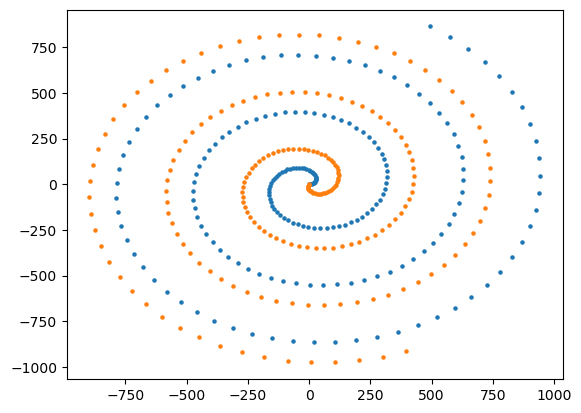

In [64]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [66]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1
#combine the two datasets
df = pd.concat([df1, df2], ignore_index=True)

#check xlass distribution
print(df['CLASS'].value_counts())

CLASS
0    200
1    200
Name: count, dtype: int64


In [68]:
df.sample(10)

,X,Y,CLASS
46,-25.795081,-228.548931,0
357,474.784343,625.143845,1
178,443.181020,-771.809940,0
321,-541.344588,-270.131519,1
327,-308.854805,-554.827639,1
202,-4.273663,-9.040786,1
179,520.929606,-727.775615,0
376,-835.233784,277.100210,1
360,273.973166,751.624044,1
249,-220.185103,107.440777,1


Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.drop(columns=["CLASS"])
X = scaler.fit_transform(x)

In [73]:
#split the training and the test data
from sklearn.model_selection import train_test_split
y = df["CLASS"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
import pandas as pd
import numpy as np

In [77]:
#create a sequantial model
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
from keras.optimizers import Adam
from keras.layers import Dropout

In [91]:
#build the model
model = Sequential([
    Dense(256, activation= "relu"),
    Dense(256, activation= "relu"),
    Dense(256, activation= "relu"),
    Dense(256, activation= "relu"),
    Dense(2, activation="softmax")])

#Compile the model
optimizer = Adam(learning_rate = 0.0001)
model.compile(
    optimizer=optimizer,
    loss= "sparse_categorical_crossentropy",
    metrics=["accuracy"])

#fitting the training data
History = model.fit(X_train,
                   y_train,
                   epochs = 500,
                   batch_size=20)
#Evaluate the mmodel
print(f"train results: ", model.evaluate(X_train,y_train))
print(f"test results: ", model.evaluate(X_test,y_test))

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4793 - loss: 0.6943
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5157 - loss: 0.6906
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4768 - loss: 0.6919
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5177 - loss: 0.6873
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4708 - loss: 0.6910 
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4963 - loss: 0.6861 
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5362 - loss: 0.6809  
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5284 - loss: 0.6882 
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5311 - loss: 0.6825 
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5366 - loss: 0.6824 
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5234 - loss: 0.6868
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

In [95]:
#Evaluate the mmodel
print(f"train results: ", model.evaluate(X_train,y_train))
print(f"test results: ", model.evaluate(X_test,y_test))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0709 
train results:  [0.07164084911346436, 1.0]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9594 - loss: 0.1716
test results:  [0.17431671917438507, 0.949999988079071]
